https://www.youtube.com/watch?v=TXDl4ocyZHg&ab_channel=RocketingDataScience

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import r2_score # R2
from sklearn.metrics import mean_squared_error # RMSE

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#  Import and read Australian Vehicle Prices.csv
Vehicleprices_df = pd.read_csv("Resources/Australian Vehicle Prices.csv")
Vehicleprices_df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [3]:
# Copying original dataset
dataset = Vehicleprices_df.copy()
dataset.tail()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888
16733,Mercedes-Benz,2021.0,C200,Sedan,2021 Mercedes-Benz C200,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,7 L / 100 km,31852,Gold / -,"Yatala, QLD",4 cyl,Sedan,4 Doors,5 Seats,65888


In [4]:
Brands = dataset['Price'].value_counts().reset_index()
Brands.tail() 

,index,Price
3789,40670,1
3790,315888,1
3791,25399,1
3792,69388,1
3793,35280,1


In [5]:
# CLEANING DATASET

# Extrating information needed from columns
pattern = r',(.*)'
dataset['State'] = dataset['Location'].str.extract(pattern)# Extrating state from location column
dataset['Litres'] = dataset['Engine'].str.extract(pattern) # Extrating litres from engine column
dataset['Litres'] = dataset['Litres'].str.strip()
pattern_1 = r'^(.*?) '
dataset['Litres'] = dataset['Litres'].str.extract(pattern_1) # Extrating litres from engine column

# Drop Columns that are not going to be used
columns_to_drop = ['Seats','Doors','ColourExtInt','DriveType','Title','FuelConsumption','FuelType','Location','Engine','CylindersinEngine']
dataset = dataset.drop(columns=columns_to_drop)

# Dropping rows with values irrelevant to this application
dataset = dataset[dataset['UsedOrNew'] != 'DEMO']
dataset = dataset[dataset['Transmission'] != '-']
dataset = dataset[(dataset['Kilometres'] != '- / -') & (dataset['Kilometres'] != '-')]
dataset = dataset[dataset['Price'] != 'POA']

# Dropping rows with null values
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

# Changing format of year to integer
dataset['Year'] = dataset['Year'].astype(int)
dataset['Kilometres'] = dataset['Kilometres'].astype(int)
dataset['Price'] = dataset['Price'].astype(int)
dataset['Litres'] = dataset['Litres'].astype(float)

# Printing results
print(dataset.info())
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13959 entries, 0 to 13958
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         13959 non-null  object 
 1   Year          13959 non-null  int32  
 2   Model         13959 non-null  object 
 3   Car/Suv       13959 non-null  object 
 4   UsedOrNew     13959 non-null  object 
 5   Transmission  13959 non-null  object 
 6   Kilometres    13959 non-null  int32  
 7   BodyType      13959 non-null  object 
 8   Price         13959 non-null  int32  
 9   State         13959 non-null  object 
 10  Litres        13959 non-null  float64
dtypes: float64(1), int32(3), object(7)
memory usage: 1.0+ MB
None


,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Kilometres,BodyType,Price,State,Litres
13954,Nissan,2009,Navara,Ute / Tray,USED,Automatic,182254,Ute / Tray,16000,VIC,2.5
13955,Hyundai,2015,I30,Wagon,USED,Automatic,54359,Wagon,21450,VIC,1.6
13956,Nissan,2021,Qashqai,SUV,USED,Automatic,32977,SUV,36770,QLD,2.0
13957,Mercedes-Benz,2016,GLC250,SUV,USED,Automatic,85525,SUV,41888,QLD,2.0
13958,Mercedes-Benz,2021,C200,Sedan,USED,Automatic,31852,Sedan,65888,QLD,2.0


In [6]:
# Look at BRAND value counts for binning
Brands = dataset['Brand'].value_counts().reset_index()
Brands.head(10) 

,index,Brand
0,Toyota,2269
1,Hyundai,1112
2,Holden,1024
3,Mazda,999
4,Ford,967
5,Mitsubishi,939
6,Nissan,820
7,Kia,757
8,Volkswagen,692
9,Mercedes-Benz,526


In [7]:
# Choose a cutoff value and create a list of Brand types to be replaced
Brand_types_to_replace = []

Brand_types_to_replace = Brands[Brands['Brand'] <=100]['index']

# Replace in dataframe
for Brands in Brand_types_to_replace:
    dataset['Brand'] = dataset['Brand'].replace(Brands,"Other")

# Check to make sure binning was successful
dataset['Brand'].value_counts()

Toyota           2269
Hyundai          1112
Holden           1024
Mazda             999
Ford              967
Mitsubishi        939
Nissan            820
Other             758
Kia               757
Volkswagen        692
Mercedes-Benz     526
Subaru            516
BMW               381
Audi              369
Honda             322
Jeep              269
Suzuki            235
MG                221
Land              195
Isuzu             172
Lexus             148
Renault           140
GWM               128
Name: Brand, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
numerical_dataset = pd.get_dummies(dataset)
numerical_dataset

,Year,Kilometres,Price,Litres,Brand_Audi,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Holden,Brand_Honda,...,BodyType_Wagon,State_ ACT,State_ AU-VIC,State_ NSW,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA
0,2022,16,19990,1.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2022,8472,108988,2.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2011,136517,32990,5.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2022,1035,34990,1.3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2017,67662,62280,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13954,2009,182254,16000,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13955,2015,54359,21450,1.6,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13956,2021,32977,36770,2.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13957,2016,85525,41888,2.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
# Split the preprocessed data into a training and testing dataset
X = numerical_dataset.drop(columns=['Price'])
y = numerical_dataset.Price

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [13]:
y_pred = lr.predict(X_test)

In [14]:
lr.score(X_test, y_test)

0.6991041277548542

In [15]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

14076.493867874504

In [16]:
print('Mean Squared Error: %.4f' % mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error %0.4f' %lr_rmse)
print('Coefficient of Determination (r2) %.4f' % r2_score(y_test, y_pred))

Mean Squared Error: 198147679.6123
Root Mean Squared Error 14076.4939
Coefficient of Determination (r2) 0.6991


In [17]:
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

print('Intercept: %.4f' %lr.intercept_)
print('Coefficients:')
coeff

Intercept: -3622300.4373
Coefficients:


,Coefficient
Year,1816.024849
Kilometres,-0.088078
Litres,7610.301781
Brand_Audi,23881.144074
Brand_BMW,9148.478826
...,...
State_ QLD,-229.773525
State_ SA,-542.041696
State_ TAS,98.632849
State_ VIC,1424.250210


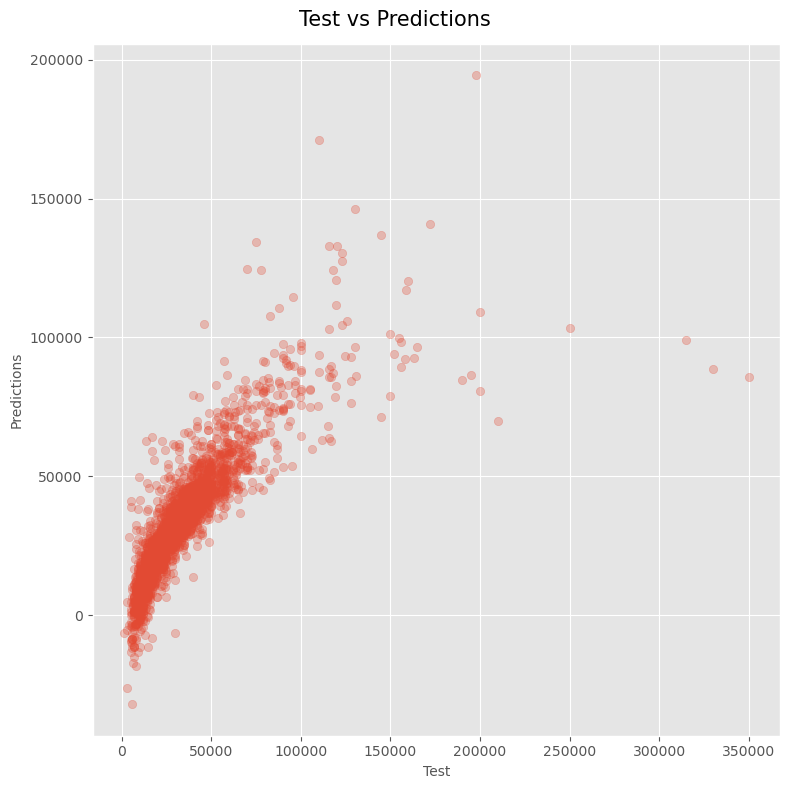

In [18]:
# Plotting y_test and y_pred

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test, y_pred, alpha=0.3)
plt.suptitle('Test vs Predictions', fontsize=15)              # Plot heading 
plt.xlabel('Test', fontsize=10)                               # X-label
plt.ylabel('Predictions', fontsize=10)                        # Y-label


fig.tight_layout()

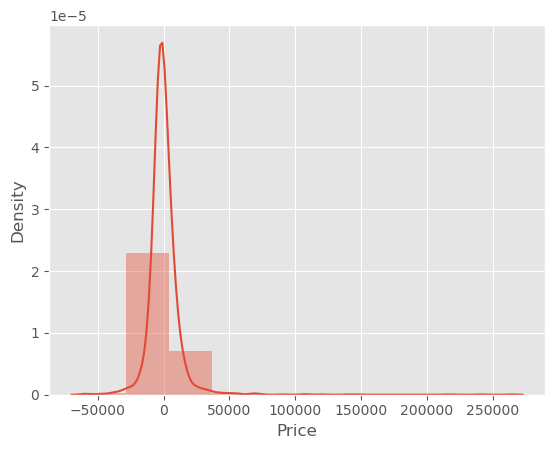

In [19]:
sns.distplot((y_test-y_pred), bins=10)
plt.show()